<a href="https://colab.research.google.com/github/rakshitha1353/carbon-footprint-calculator/blob/main/carbon_footprint_calculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter your commercial (Office energy use (kWh/month)): 4000
Enter your transport (km traveled per month): 5000
Enter your software_device_runtime (Hours of software/device use per week): 15
Enter your flight (km flown per year): 5000
Enter your food (kg food consumed per month): 500
Enter your home_energy (Home energy use (kWh/month)): 400
Predicted Carbon Footprint: 2250.05 kg CO2e per year


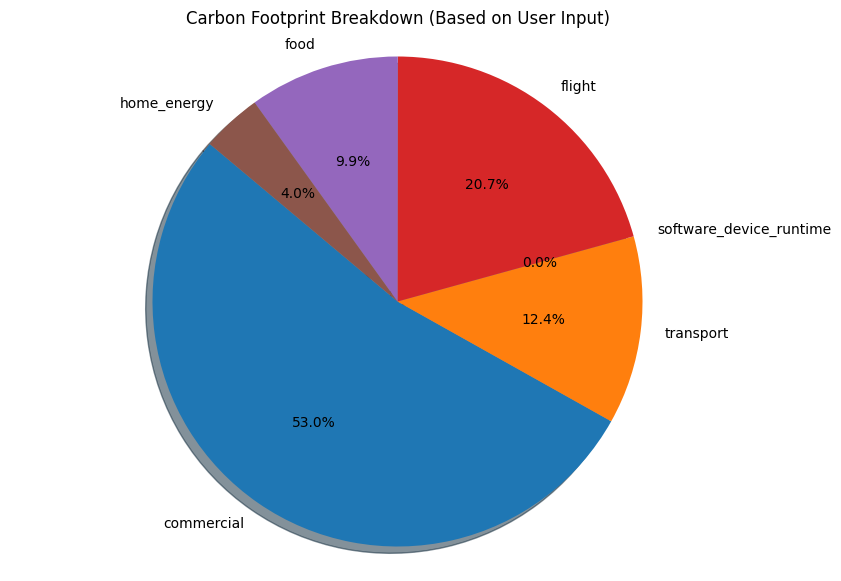


Recommendations and Solutions:
- commercial: Invest in renewable energy.
  Solutions:
    - Install solar panels or wind turbines.
    - Explore green building certifications (LEED).
- transport: Transition to electric vehicles.
  Solutions:
    - Provide EV charging stations.
    - Offer incentives for electric car purchases.
- software_device_runtime: Use energy-efficient software.
  Solutions:
    - Look for cloud-based solutions.
    - Choose energy-efficient hardware.
- flight: Offset carbon emissions.
  Solutions:
    - Invest in carbon offsetting programs.
    - Support sustainable aviation initiatives.
- food: Choose sustainable food options.
  Solutions:
    - Buy locally sourced and seasonal produce.
    - Support sustainable agriculture practices.
- home_energy: Consider renewable energy.
  Solutions:
    - Install solar panels.
    - Explore geothermal energy.


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# --- 1. Data Preparation (REPLACE WITH YOUR ACTUAL DATA) ---
np.random.seed(42)
num_samples = 100

data = {
    'commercial': np.random.rand(num_samples) * 500 + 200,
    'transport': np.random.rand(num_samples) * 300 + 50,
    'software_device_runtime': np.random.rand(num_samples) * 150 + 20,
    'flight': np.random.rand(num_samples) * 400,
    'food': np.random.rand(num_samples) * 250 + 100,
    'home_energy': np.random.rand(num_samples) * 500 + 150,
    'total_footprint': np.random.rand(num_samples) * 2000 + 1000
}

df = pd.DataFrame(data)

# --- 2. Model Training ---
X = df[['commercial', 'transport', 'software_device_runtime', 'flight', 'food', 'home_energy']]
y = df['total_footprint']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# --- 3. User Input ---
def get_user_input():
    activities = {
        'commercial': 'Office energy use (kWh/month)',
        'transport': 'km traveled per month',
        'software_device_runtime': 'Hours of software/device use per week',
        'flight': 'km flown per year',
        'food': 'kg food consumed per month',
        'home_energy': 'Home energy use (kWh/month)'
    }
    user_input = {}
    for activity, unit in activities.items():
        while True:
            try:
                level = float(input(f"Enter your {activity} ({unit}): "))
                if level >= 0:
                    user_input[activity] = level
                    break
                else:
                    print("Invalid input. Please enter a non-negative number.")
            except ValueError:
                print("Invalid input. Please enter a number.")
    return user_input

# --- 4. Carbon Footprint Calculation ---
def calculate_carbon_footprint(user_input, model):
    try:
        input_df = pd.DataFrame([user_input])
        prediction = model.predict(input_df)[0]
        return prediction
    except Exception as e:
        return f"Error in calculation: {e}"

# --- 5. Pie Chart, Recommendations, and Solutions ---
def plot_carbon_breakdown_and_recommendations(user_input, prediction):
    activities = ['commercial', 'transport', 'software_device_runtime', 'flight', 'food', 'home_energy']
    emissions = {}

    emission_factors = {  # Example factors (REPLACE with your actual data/calculations)
        'commercial': 0.8,
        'transport': 0.15,
        'software_device_runtime': 0.01,
        'flight': 0.25,
        'food': 1.2,
        'home_energy': 0.6
    }

    for activity in activities:
        if activity in emission_factors:
            emissions[activity] = user_input[activity] * emission_factors[activity]
        else:
            emissions[activity] = 0

    total_emissions = sum(emissions.values())
    if total_emissions > 0:
        for activity in emissions:
            emissions[activity] = (emissions[activity] / total_emissions) * prediction

    plt.figure(figsize=(10, 7))
    plt.pie(emissions.values(), labels=emissions.keys(), autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.title('Carbon Footprint Breakdown (Based on User Input)')
    plt.show()

    print("\nRecommendations and Solutions:")
    for activity, emission in emissions.items():
        if emission > 0:
            recommendation, solutions = suggest_recommendations_and_solutions(activity, user_input[activity])
            print(f"- {activity}: {recommendation}")
            print("  Solutions:")
            for solution in solutions:
                print(f"    - {solution}")
        else:
            print(f"- {activity}: No specific recommendations (emissions are zero).")


# --- 6. Recommendation and Solution Logic ---
def suggest_recommendations_and_solutions(activity, level):
    recommendations = {
        'commercial': {
            (0, 500): ("Implement energy-saving practices.", ["Optimize lighting and HVAC systems.", "Conduct regular energy audits."]),
            (500, 1000): ("Upgrade to energy-efficient equipment.", ["Replace old appliances with Energy Star certified models.", "Invest in smart building management systems."]),
            (1000, float('inf')): ("Invest in renewable energy.", ["Install solar panels or wind turbines.", "Explore green building certifications (LEED)."])
        },
        'transport': {
            (0, 50): ("Promote active transportation.", ["Encourage walking and cycling.", "Provide bike racks and showers at work."]),
            (50, 150): ("Improve public transportation access.", ["Offer subsidized transit passes.", "Support local public transport initiatives."]),
            (150, float('inf')): ("Transition to electric vehicles.", ["Provide EV charging stations.", "Offer incentives for electric car purchases."])
        },
        'software_device_runtime': {
            (0, 10): ("Optimize software usage.", ["Close unused programs and tabs.", "Unplug devices when not in use."]),
            (10, 20): ("Use energy-efficient software.", ["Look for cloud-based solutions.", "Choose energy-efficient hardware."]),
            (20, float('inf')): ("Reduce software reliance.", ["Evaluate software needs.", "Streamline workflows to minimize software use."])
        },
        'flight': {
            (0, 200): ("Consider alternative transportation.", ["Travel by train or bus instead of flying.", "Opt for virtual meetings instead of in-person conferences."]),
            (200, 1000): ("Fly less frequently.", ["Combine trips to reduce the number of flights.", "Choose direct flights to minimize fuel consumption."]),
            (1000, float('inf')): ("Offset carbon emissions.", ["Invest in carbon offsetting programs.", "Support sustainable aviation initiatives."])
        },
        'food': {
            (0, 100): ("Reduce food waste.", ["Plan meals carefully to avoid spoilage.", "Compost food scraps."]),
            (100, 200): ("Eat less meat.", ["Reduce red meat consumption.", "Choose plant-based meals more often."]),
            (200, float('inf')): ("Choose sustainable food options.", ["Buy locally sourced and seasonal produce.", "Support sustainable agriculture practices."])
        },
        'home_energy': {
            (0, 200): ("Improve home insulation.", ["Seal air leaks.", "Add insulation."]),
            (200, 400): ("Upgrade appliances.", ["Replace old appliances with Energy Star certified models.", "Use smart thermostats."]),
            (400, float('inf')): ("Consider renewable energy.", ["Install solar panels.", "Explore geothermal energy."])
        }
    }

    for level_range, (recommendation, solutions) in recommendations[activity].items():
        lower, upper = level_range
        if lower <= level < upper:
            return recommendation, solutions
    return "No specific recommendations available.", []


# --- 7. Main Execution ---
user_input = get_user_input()

if user_input:
    prediction = calculate_carbon_footprint(user_input, model)

    if isinstance(prediction, (int, float)):
        print(f"Predicted Carbon Footprint: {prediction:.2f} kg CO2e per year")
        plot_carbon_breakdown_and_recommendations(user_input, prediction)
    elif isinstance(prediction, str):
        print(prediction)

else:
    print("No activity data was entered.")